## **LoanTap - Introduction**
- LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

- The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

# **Importing libraries**

In [444]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
path = "/content/drive/MyDrive/logistic_regression.csv"
df = pd.read_csv(path)

**Exploring the structure and characteristics of the data set**

In [445]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [446]:
df.shape

(396030, 27)

In [447]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [448]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

- From the initial looks, few columns have considerably large number of missing values.

In [449]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [450]:
df.describe(include=object).T

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,373103,173105,Teacher,4389
emp_length,377729,11,10+ years,126041
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,Oct-2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507


## Exploratory Data Analysis(EDA)

In [452]:
for i in df.columns:
  print(f"Unique entries in {i: <25} = {df[i].nunique()}")

Unique entries in loan_amnt                 = 1397
Unique entries in term                      = 2
Unique entries in int_rate                  = 566
Unique entries in installment               = 55706
Unique entries in grade                     = 7
Unique entries in sub_grade                 = 35
Unique entries in emp_title                 = 173105
Unique entries in emp_length                = 11
Unique entries in home_ownership            = 6
Unique entries in annual_inc                = 27197
Unique entries in verification_status       = 3
Unique entries in issue_d                   = 115
Unique entries in loan_status               = 2
Unique entries in purpose                   = 14
Unique entries in title                     = 48817
Unique entries in dti                       = 4262
Unique entries in earliest_cr_line          = 684
Unique entries in open_acc                  = 61
Unique entries in pub_rec                   = 20
Unique entries in revol_bal                 = 55622
Un

In [453]:
df["loan_amnt"].value_counts()

10000.0    27668
12000.0    21366
15000.0    19903
20000.0    18969
35000.0    14576
           ...  
36225.0        1
950.0          1
37800.0        1
30050.0        1
725.0          1
Name: loan_amnt, Length: 1397, dtype: int64

In [454]:
df["term"].value_counts()

 36 months    302005
 60 months     94025
Name: term, dtype: int64

**Term**- The number of payments on the loan which is given is 2 different duration, 1 - 36 months and 2 - 60 months.
Of which most loan term records are under 36 months alone(76%) - of which 12% is charged off and 64% under Fully paid category.

In [455]:
pd.crosstab( index=df["loan_status"], columns=df["term"], normalize = True, margins= True)*100

term,36 months,60 months,All
loan_status,,,
Charged Off,12.029392,7.583516,19.612908
Fully Paid,64.228720,16.158372,80.387092
All,76.258112,23.741888,100.000000


In [456]:
df["int_rate"].value_counts()

10.99    12411
12.99     9632
15.61     9350
11.99     8582
8.90      8019
         ...  
14.28        1
18.72        1
18.36        1
30.84        1
24.59        1
Name: int_rate, Length: 566, dtype: int64

**Max count of interest rate is 10.99%**

In [457]:
df["installment"].value_counts()

327.34     968
332.10     791
491.01     736
336.90     686
392.81     683
          ... 
364.37       1
1015.29      1
398.04       1
544.94       1
572.44       1
Name: installment, Length: 55706, dtype: int64

In [458]:
grade = df["grade"].value_counts()
grade

B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64

In [460]:
df["emp_title"].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [461]:
df["emp_length"].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [462]:
df["home_ownership"].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [463]:
df["annual_inc"].value_counts()

60000.00    15313
50000.00    13303
65000.00    11333
70000.00    10674
40000.00    10629
            ...  
72179.00        1
50416.00        1
46820.80        1
10368.00        1
31789.88        1
Name: annual_inc, Length: 27197, dtype: int64

In [464]:
df["verification_status"].value_counts()

Verified           139563
Source Verified    131385
Not Verified       125082
Name: verification_status, dtype: int64

In [465]:
df["issue_d"].value_counts()

Oct-2014    14846
Jul-2014    12609
Jan-2015    11705
Dec-2013    10618
Nov-2013    10496
            ...  
Jul-2007       26
Sep-2008       25
Nov-2007       22
Sep-2007       15
Jun-2007        1
Name: issue_d, Length: 115, dtype: int64

In [466]:
df["loan_status"].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [467]:
df["purpose"].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

In [468]:
df["title"].value_counts()

Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: title, Length: 48817, dtype: int64

In [469]:
df["dti"].value_counts()

0.00     313
14.40    310
19.20    302
16.80    301
18.00    300
        ... 
59.18      1
48.37      1
45.71      1
42.38      1
55.53      1
Name: dti, Length: 4262, dtype: int64

In [470]:
df["earliest_cr_line"].value_counts()

Oct-2000    3017
Aug-2000    2935
Oct-2001    2896
Aug-2001    2884
Nov-2000    2736
            ... 
Jul-1958       1
Nov-1957       1
Jan-1953       1
Jul-1955       1
Aug-1959       1
Name: earliest_cr_line, Length: 684, dtype: int64

In [473]:
df["revol_bal"].value_counts()

0.0         2128
5655.0        41
6095.0        38
7792.0        38
3953.0        37
            ... 
42573.0        1
72966.0        1
105342.0       1
37076.0        1
29244.0        1
Name: revol_bal, Length: 55622, dtype: int64

In [474]:
df["revol_util"].value_counts()

0.00      2213
53.00      752
60.00      739
61.00      734
55.00      730
          ... 
892.30       1
110.10       1
123.00       1
49.63        1
128.10       1
Name: revol_util, Length: 1226, dtype: int64

In [478]:
df["mort_acc"].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [479]:
df["pub_rec_bankruptcies"].value_counts()

0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

In [480]:
df["address"][10]
df["pincode"] = df["address"].str.split().apply(lambda x:x[-1])
df["pincode"].value_counts()

70466    56985
30723    56546
22690    56527
48052    55917
00813    45824
29597    45471
05113    45402
11650    11226
93700    11151
86630    10981
Name: pincode, dtype: int64

- 10 unique pincodes are found in the data.

In [482]:
pd.crosstab(index= df["pincode"], columns = df["loan_status"], normalize="index", margins = True)*100

loan_status,Charged Off,Fully Paid
pincode,,
00813,0.000000,100.000000
05113,0.000000,100.000000
11650,100.000000,0.000000
22690,19.378350,80.621650
29597,0.000000,100.000000
30723,19.490326,80.509674
48052,20.015380,79.984620
70466,19.563043,80.436957
86630,100.000000,0.000000


In [483]:
df.drop(columns=["address"], inplace= True)

<ipython-input-484-bae117d587f1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap= "YlGnBu")


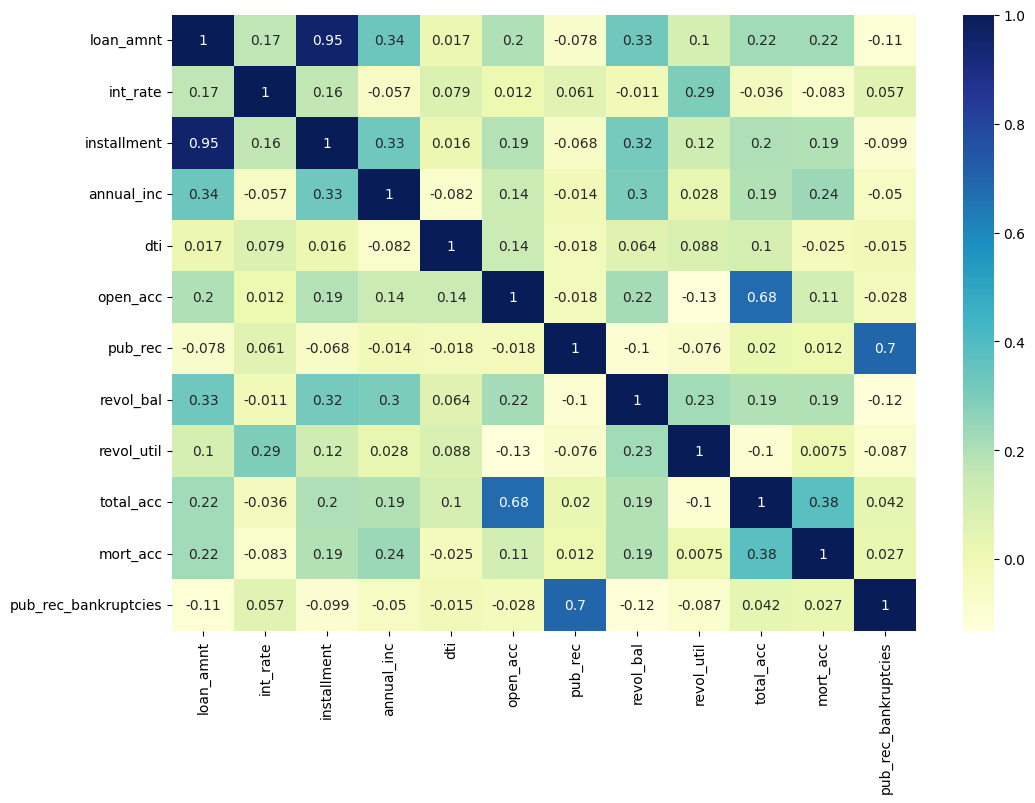

In [484]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap= "YlGnBu")
plt.show()

- Based on the ***correlation*** data, it is observed that **"Loan-amount" and "Installment" have the highest correlation(0.95)**. Followed by "Pub_rec" and 'Pub_rec_bankruptcies" of 0.7. And "total_acc" and "open_acc" of 0.68.
Lowest negative correlation is observed between "open_acc" and "revol_util" of -0.13.

In [485]:
pd.crosstab(index= df["verification_status"], columns = df["loan_status"], normalize=True, margins = True)*100

loan_status,Charged Off,Fully Paid,All
verification_status,,,
Not Verified,4.622630,26.961341,31.583971
Source Verified,7.124208,26.051309,33.175517
Verified,7.866071,27.374441,35.240512
All,19.612908,80.387092,100.000000


**Verification status** has 33% of "source verified" category, 35% of "verified" category and 31% of "not verified" category. Of which 80% data are under fully paid and rest are under "Charged off" status.

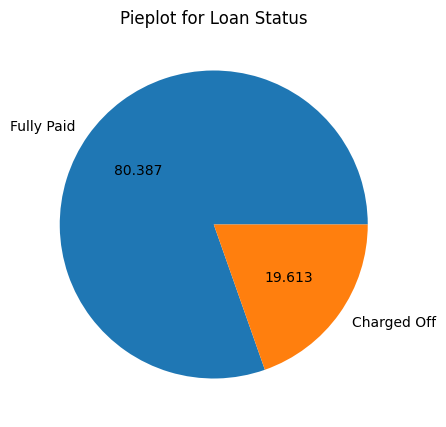

In [486]:
Loan_Status = df['loan_status'].value_counts()
plt.figure(figsize = (5,5))
plt.pie(Loan_Status, labels = Loan_Status.index, autopct = "%.3f")
plt.title("Pieplot for Loan Status")
plt.show()

Out of the total given data, and according this pie chart on loan status, 80% are fully paid anf 19% are charged off.

<Axes: xlabel='loan_status', ylabel='int_rate'>

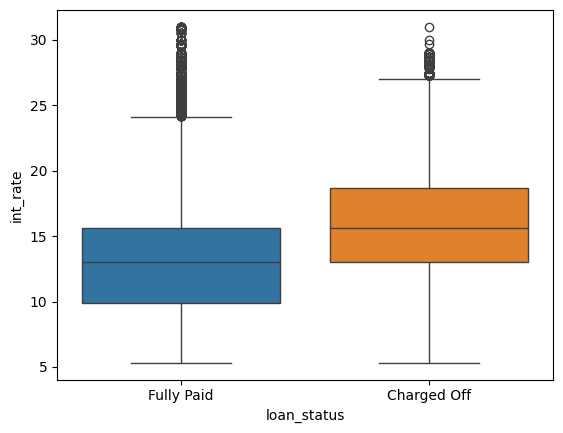

In [487]:
sns.boxplot(x=df["loan_status"],
            y=df["int_rate"], hue = df["loan_status"])

When box-plot analysis was made between two columnns *"Loan status" and the "interest rate"*, it is observed than **"Fully paid" status have mean interest rate of around 13-14%** and mean for charged off interest rate is above 15%.There are also many outliers above 25% interest rate in Fully paid status

<Axes: xlabel='int_rate', ylabel='Count'>

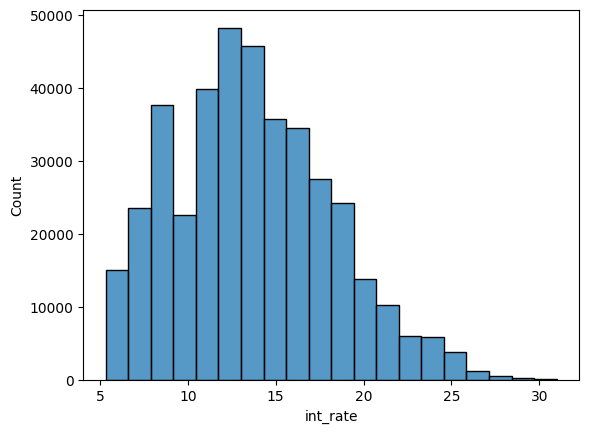

In [488]:
sns.histplot(data=df["int_rate"], bins= 20)

- Hist plot was created to see the distribution of interest rate and its count, and it's been observed that 12% to 14% interest rate has the most counts of above 40,000

In [489]:
df["home_ownership"] = df["home_ownership"].replace({"NONE":"OTHER", "ANY":"OTHER"})
df["home_ownership"].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_ownership, dtype: int64

<Axes: xlabel='home_ownership', ylabel='count'>

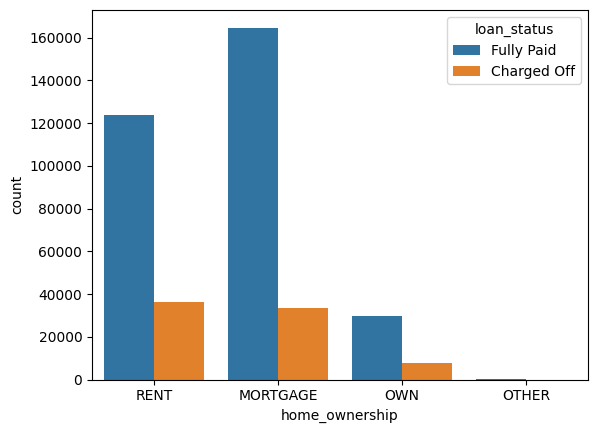

In [490]:
#Home ownership analysis against loan status
sns.countplot(x=df["home_ownership"], hue=df["loan_status"])

Initially there were 6 categories under "home-ownership", of which "None" and "Any" have been replaced as "Other". And the total of other only comes around 146, least of all. Among the rest "mortgage" catg. has the most count and most are under Fully-paid status as well.

<ipython-input-491-ee9ac4b233a1>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


[Text(0, 0, 'B4'),
 Text(1, 0, 'B5'),
 Text(2, 0, 'B3'),
 Text(3, 0, 'A2'),
 Text(4, 0, 'C5'),
 Text(5, 0, 'C3'),
 Text(6, 0, 'A1'),
 Text(7, 0, 'B2'),
 Text(8, 0, 'C1'),
 Text(9, 0, 'A5'),
 Text(10, 0, 'E4'),
 Text(11, 0, 'A4'),
 Text(12, 0, 'A3'),
 Text(13, 0, 'D1'),
 Text(14, 0, 'C2'),
 Text(15, 0, 'B1'),
 Text(16, 0, 'D3'),
 Text(17, 0, 'D5'),
 Text(18, 0, 'D2'),
 Text(19, 0, 'E1'),
 Text(20, 0, 'E2'),
 Text(21, 0, 'E5'),
 Text(22, 0, 'F4'),
 Text(23, 0, 'E3'),
 Text(24, 0, 'D4'),
 Text(25, 0, 'G1'),
 Text(26, 0, 'F5'),
 Text(27, 0, 'G2'),
 Text(28, 0, 'C4'),
 Text(29, 0, 'F1'),
 Text(30, 0, 'F3'),
 Text(31, 0, 'G5'),
 Text(32, 0, 'G4'),
 Text(33, 0, 'F2'),
 Text(34, 0, 'G3')]

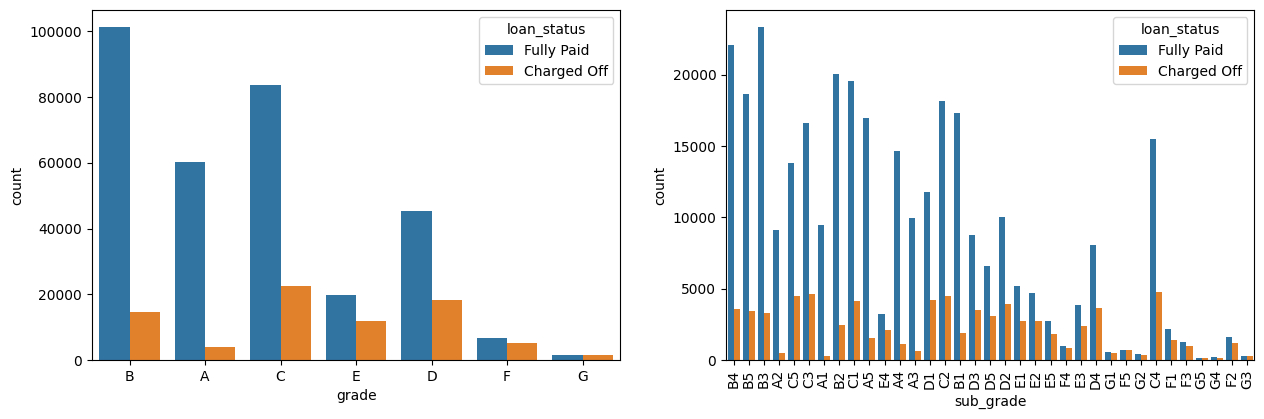

In [491]:
# Grade and Sub-grade analysis against loan-status
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.countplot(x=df['grade'], data=df, hue=df['loan_status'])

plt.subplot(2, 2, 2)
g = sns.countplot(x=df['sub_grade'], data=df, hue=df['loan_status'])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

- B is the best performing grade even in loan status where max are under "Fully-paid" status. And G grade has less count and poor loan status too.

In [492]:
# Sub-grades - B3, B4 are best performing sub-grades and G4 and G5 are the worst.
# Even in terms of loan-status category.

<ipython-input-493-a939f8604c11>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  e.set_xticklabels(e.get_xticklabels(),rotation=90)
<ipython-input-493-a939f8604c11>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


[Text(0, 0, 'vacation'),
 Text(1, 0, 'debt_consolidation'),
 Text(2, 0, 'credit_card'),
 Text(3, 0, 'home_improvement'),
 Text(4, 0, 'small_business'),
 Text(5, 0, 'major_purchase'),
 Text(6, 0, 'other'),
 Text(7, 0, 'medical'),
 Text(8, 0, 'wedding'),
 Text(9, 0, 'car'),
 Text(10, 0, 'moving'),
 Text(11, 0, 'house'),
 Text(12, 0, 'educational'),
 Text(13, 0, 'renewable_energy')]

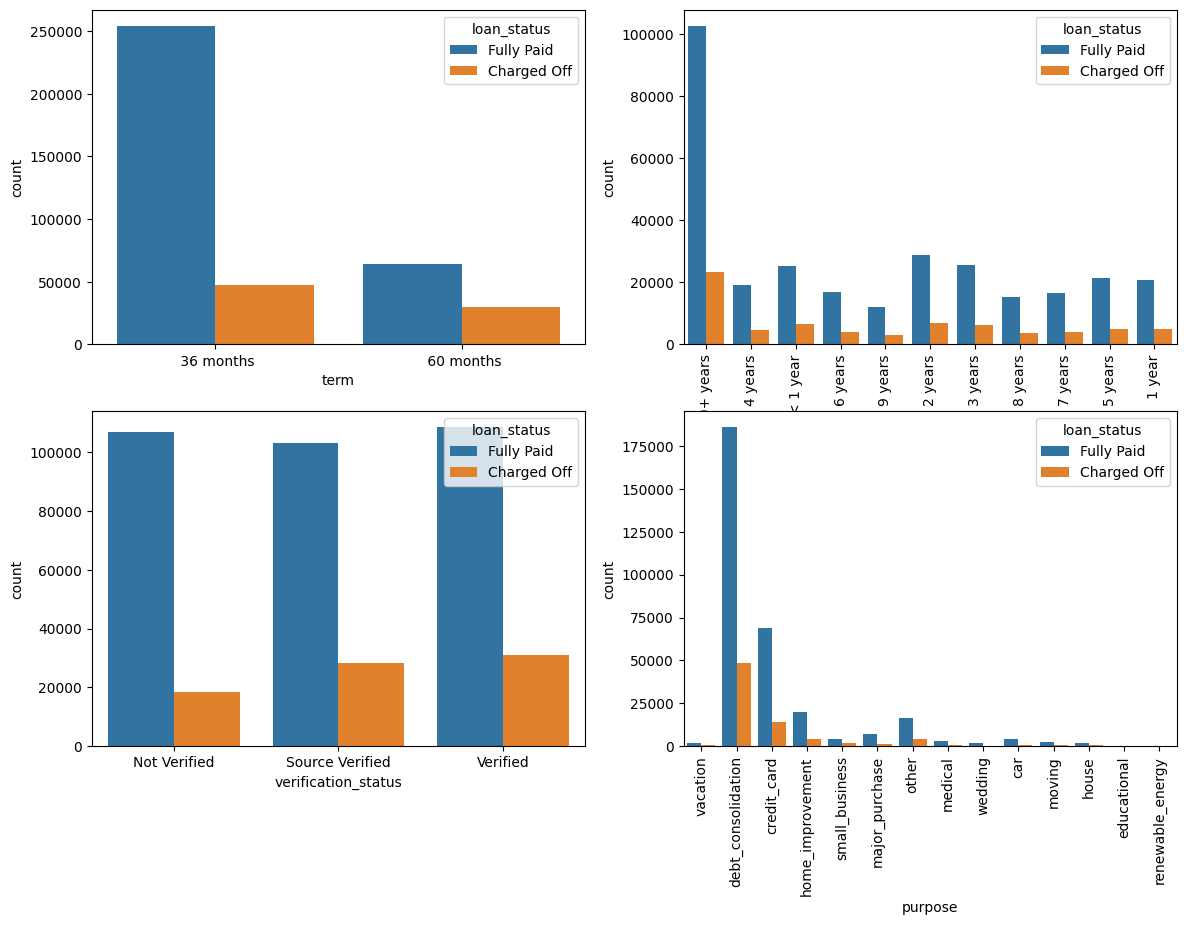

In [493]:
# Term, Employment length, Verification status and purpose columns against Loan - status
plt.figure(figsize=(14,20))

plt.subplot(4,2,1)
sns.countplot(x='term',data=df,hue='loan_status')

plt.subplot(4,2,2)
e=sns.countplot(x='emp_length',data=df,hue='loan_status')
e.set_xticklabels(e.get_xticklabels(),rotation=90)

plt.subplot(4,2,3)
sns.countplot(x='verification_status',data=df,hue='loan_status')

plt.subplot(4,2,4)
g=sns.countplot(x='purpose',data=df,hue='loan_status')
g.set_xticklabels(g.get_xticklabels(),rotation=90)

* **Term**- Almost 2.5lakh data are observed under 36 months an fully paid category.
* **Employment length** - Most people under this data comes under 10+ years category and has 1 lakh+ "fully paid" status.
* **Verification Status** - Almost all there category have 1 lakh + fully paid loan status each.
* **Purpose** - Most reason why people have opted for Loan seems to be "debt consolidation" and "credit card". And 1.75 lakh+ data under debt consolidation purpose are in "fully paid" status. "Education" and "Renewable energy" comes under the least listed purposes for loan.


In [494]:
emp_title= df["emp_title"].value_counts()[:30]

Text(0.5, 1.0, 'The most 30 jobs title afforded a loan')

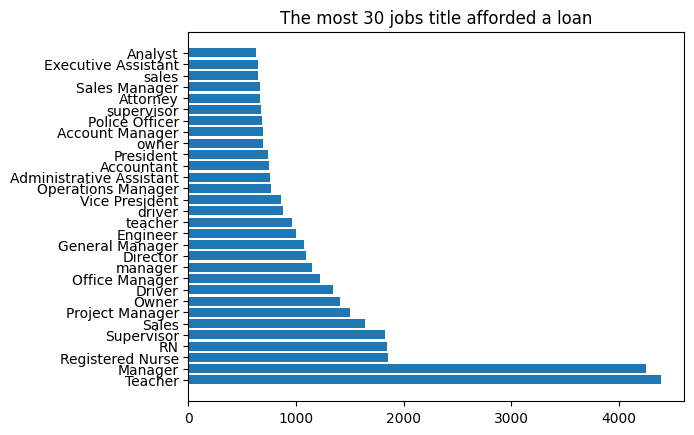

In [495]:
# Job title analysis
plt.barh(emp_title.index, emp_title)
plt.title("The most 30 jobs title afforded a loan")

* Out of 1.7 lakh+ listed job titles, the job titles which bagged loan the most seems to be "Teacher" and "Manager" with more than 4000 counts each.

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

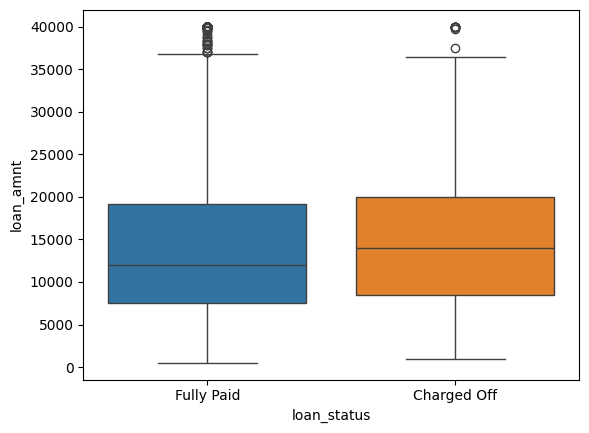

In [496]:
#Loan amount vs Loan status
sns.boxplot(x=df["loan_status"],
            y=df["loan_amnt"], hue = df["loan_status"])

- **Loan amount** doesn't seem to be affecting the loan status much, eventhough the mean for fully paid is less than charged off and there are way too many outliers in "fully paid" which means higher loan amount has been cleared off by maximum people as well.
- But there are people with higher loan amount being charged off.

In [497]:
# Creation of flags if value greater than 1.0 then 1 else 0 for 3 columns:

def pub_rec(x):
    if x == 0.0:
        return 0
    else:
        return 1

def mort_acc(x):
    if x == 0.0:
        return 0
    elif x >= 1.0:
        return 1
    else:
        return x

def pub_rec_bankruptcies(x):
    if x == 0.0:
        return 0
    elif x >= 1.0:
        return 1
    else:
        return x

In [498]:
df['pub_rec']=df.pub_rec.apply(pub_rec)
df['mort_acc']=df.mort_acc.apply(mort_acc)
df['pub_rec_bankruptcies']=df.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

<Axes: xlabel='pub_rec_bankruptcies', ylabel='count'>

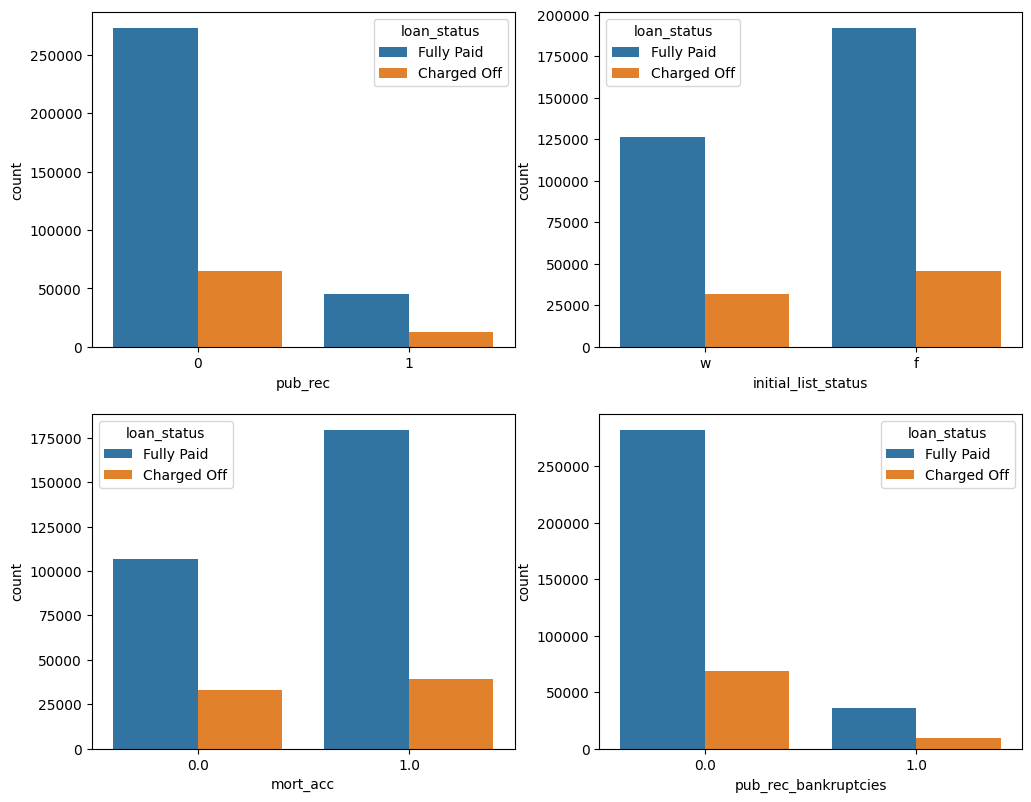

In [499]:
# Pub_rec, "Initial_list_status", "Mort_acc" and "pub_rec_bankruptcies" against "Loan_status"
plt.figure(figsize=(12,20))

plt.subplot(4,2,1)
sns.countplot(x='pub_rec',data=df,hue='loan_status')

plt.subplot(4,2,2)
sns.countplot(x='initial_list_status',data=df,hue='loan_status')

plt.subplot(4,2,3)
sns.countplot(x='mort_acc',data=df,hue='loan_status')

plt.subplot(4,2,4)
sns.countplot(x='pub_rec_bankruptcies',data=df,hue='loan_status')

* **Pub_rec** - In the number of derogatory public records category, people who have "0.0" have mostly paid the loans and its almost the same with others as well. only significantly less people with or without derogatory public records have been charged off.
* **Mort_acc**- People with or without mortagaged accounts have similar count of "charged off" status.
* **Pub_rec_bankruptcies** - Very less data has only been observed for people with public record bankruptcies and even in that "charged off" status is meagre.

INDIVIDUAL    99.820468
JOINT          0.107315
DIRECT_PAY     0.072217
Name: application_type, dtype: float64


<Axes: xlabel='application_type', ylabel='count'>

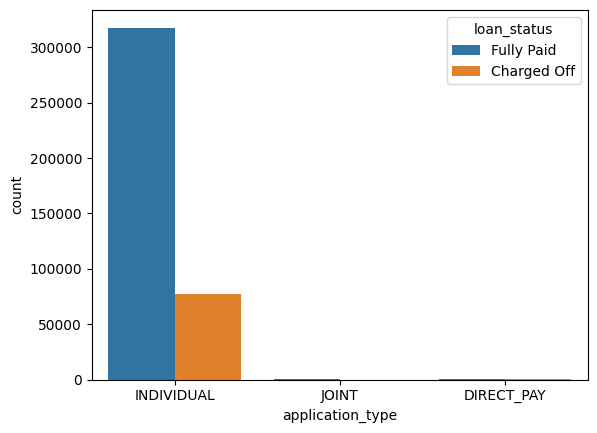

In [500]:
#Application type vs loan status
print(df["application_type"].value_counts(normalize=True)*100)
sns.countplot(x='application_type',data=df,hue='loan_status')

- Almost 99% of data comes under "INDIVIDUAL" application type and among that 3 lakh+ data are under "Fully paid" category

In [501]:
# Mapping of target variable
df['loan_status']=df.loan_status.map({'Fully Paid':0, 'Charged Off':1})

In [502]:
#annual_inc : The self-reported annual income provided by the borrower during registration.

<ipython-input-503-c31ff4201efc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["annual_inc"])


<Axes: xlabel='annual_inc', ylabel='Density'>

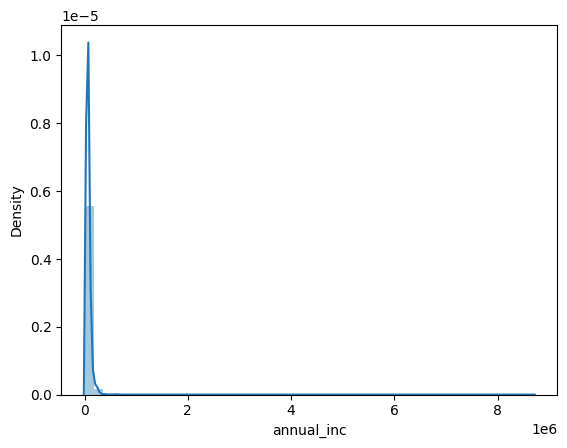

In [503]:
sns.distplot(df["annual_inc"])

- Eventhough the value for annual income spreads from 0 to 8.7lakhs. The mean is around 74k only and hence the distribution also peaked only initially.

<Axes: xlabel='loan_status', ylabel='annual_inc'>

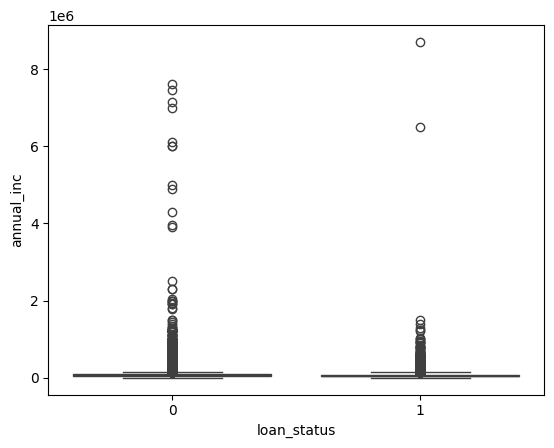

In [504]:
#Annual income vs loan status
sns.boxplot(x=df["loan_status"], y=df["annual_inc"])

- Annual income doesn't seem to be affecting the loan status since there are outliers for charged off category as well

<Axes: ylabel='Count'>

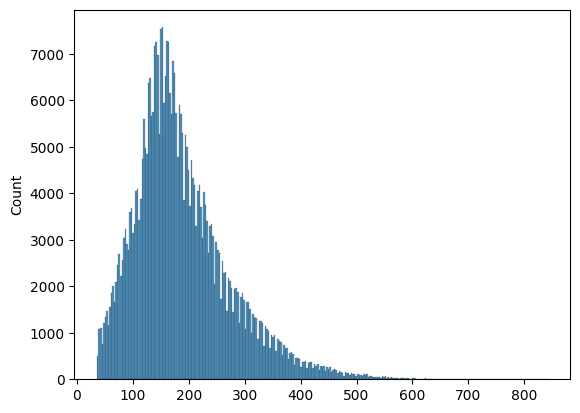

In [505]:
sns.histplot(((pd.to_datetime(df["issue_d"]) -pd.to_datetime(df["earliest_cr_line"]))/np.timedelta64(1, 'M')))

<Axes: xlabel='loan_status', ylabel='None'>

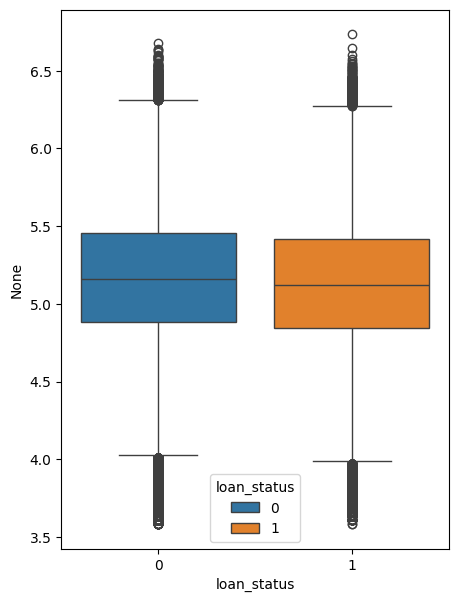

In [506]:
# Loan tenure vs Loan status
plt.figure(figsize=(5,7))
sns.boxplot(y=np.log(((pd.to_datetime(df["issue_d"]) -pd.to_datetime(df["earliest_cr_line"]))/np.timedelta64(1, 'M'))),
            x=df["loan_status"], hue = df["loan_status"])

Hence not much impact is seen in the loan status using the loan tenure period.

In [507]:
#Dropping unimportant cols.
df.drop(["title","issue_d","earliest_cr_line","initial_list_status"],axis = 1, inplace=True)

# Insights based on EDA

- Out of the given 3,90,000 data, given data had 1397 unique loan amount entries.Max loan amount is Rs. 40000 and mean is 14113.
- The data has 7 different grades**(A to G, B is the most frequent)** and 35 different sub-grades.
- The data has **interest rate ranging from 5.3% to 30.99% **and has 566 unique values. **Mean interest is 13%.**
- The job title(emp_title) supplied by the Borrower when applying for the loan has 170k+ unique values.
- Employment length in years has 11 different values.
- The **home ownership status** provided by the borrower during registration has **6 unique entries**. Of which "Mortgage" is the highly recorded value.
- The self-reported annual income provided by the borrower during registration has 27k+ unique values and mean reported income is 74k
- Loan status which is the target variable has 2 different values -** "Fully paid" and "Charged off"**, of which 3.1 lakh+ paid entries.
- Number of derogatory public records(pub_rec) has 20 different entries. Ranges from 0 to 86. And the mean is 0.17.
- There are 3 different application type. Of which "Individual" is the dominating one.
- "Teacher" and "Manager" are the job titles to have secured most loan count.
- Most of the columns have little to no impact over the loan status.

# **Missing value treatment**

In [508]:
from sklearn.impute import SimpleImputer
Imputer = SimpleImputer(strategy="most_frequent")
df["mort_acc"] = Imputer.fit_transform(df["mort_acc"].values.reshape(-1,1))

In [509]:
df.dropna(inplace=True)

In [510]:
!pip install category_encoders

In [511]:
from category_encoders import TargetEncoder

In [512]:
TE = TargetEncoder()
target_enc = ["sub_grade","grade",'term', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'application_type', 'pincode']

In [513]:
for i in target_enc:
    df[i] = TE.fit_transform(df[i],df["loan_status"])

In [514]:
df.shape

(372161, 23)

# **Outlier treatment**

In [515]:
cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'open_acc','revol_bal', 'revol_util', 'total_acc']

In [516]:
#Detecting outliers
for i in cols:
    Q1 = np.quantile(df[i], 0.25)
    Q2 = np.quantile(df[i], 0.50)
    Q3 = np.quantile(df[i], 0.75)
    IQR = Q3 - Q1
    LW = max(Q1 - 1.5 * IQR, 0)
    UW = Q3 + 1.5 * IQR
    outliers = df.loc[(df[i] <= LW) | (df[i] >= UW)]
    print('Column :', i)
    print(f'Q1 : {Q1}')
    print(f"Q2 : {Q2} ")
    print(f'Q3 : {Q3}')
    print(f'IQR : {IQR}')
    print(f'Lower_whisker : {LW}')
    print(f'Upper_whisker : {UW}')
    print(f'Number of outliers : {outliers.shape[0]}')
    print('---------------------------')

Column : loan_amnt
Q1 : 8000.0
Q2 : 12000.0 
Q3 : 20000.0
IQR : 12000.0
Lower_whisker : 0
Upper_whisker : 38000.0
Number of outliers : 190
---------------------------
Column : int_rate
Q1 : 10.49
Q2 : 13.33 
Q3 : 16.49
IQR : 5.999999999999998
Lower_whisker : 1.4900000000000038
Upper_whisker : 25.489999999999995
Number of outliers : 3572
---------------------------
Column : annual_inc
Q1 : 46000.0
Q2 : 65000.0 
Q3 : 90000.0
IQR : 44000.0
Lower_whisker : 0
Upper_whisker : 156000.0
Number of outliers : 16292
---------------------------
Column : dti
Q1 : 11.32
Q2 : 16.9 
Q3 : 22.94
IQR : 11.620000000000001
Lower_whisker : 0
Upper_whisker : 40.370000000000005
Number of outliers : 497
---------------------------
Column : open_acc
Q1 : 8.0
Q2 : 11.0 
Q3 : 14.0
IQR : 6.0
Lower_whisker : 0
Upper_whisker : 23.0
Number of outliers : 12779
---------------------------
Column : revol_bal
Q1 : 6112.0
Q2 : 11298.0 
Q3 : 19765.0
IQR : 13653.0
Lower_whisker : 0
Upper_whisker : 40244.5
Number of outliers

In [517]:
def outlier_remover(a,df):

    q1 = a.quantile(.25)
    q3 = a.quantile(.75)
    iqr = q3 - q1

    maxx = q3 + 1.5 * iqr
    minn = q1 - 1.5 * iqr

    return df.loc[(a>=minn) & (a<=maxx)]

In [518]:
for i in cols:
    df = outlier_remover(df[i],df)

In [519]:
df.shape

(321688, 23)

In [520]:
def missing_df(data):
    total_missing_df = data.isna().sum().sort_values(ascending = False)
    percentage_missing_df = ((data.isna().sum()/len(data)*100)).sort_values(ascending = False)
    missingDF = pd.concat([total_missing_df, percentage_missing_df],axis = 1, keys=['Total', 'Percent'])
    return missingDF


missing_data = missing_df(df)
missing_data[missing_data["Total"]>0]

,Total,Percent


In [521]:
#dropping unimportant columns
df.drop(["mort_acc","pub_rec_bankruptcies","pub_rec"],axis = 1 , inplace=True)

# **Train-test split**

In [522]:
X = df.drop(["loan_status"],axis = 1)
y = df["loan_status"]

In [523]:
X.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,open_acc,revol_bal,revol_util,total_acc,application_type,pincode
0,10000.0,0.152246,11.44,329.48,0.121856,0.134935,0.247136,0.184208,0.222392,117000.0,0.144925,0.183348,26.24,16.0,36369.0,41.8,25.0,0.1922,0.189578
1,8000.0,0.152246,11.99,265.68,0.121856,0.150496,0.214018,0.191896,0.166495,65000.0,0.144925,0.203895,22.05,17.0,20131.0,53.3,27.0,0.1922,0.000000
2,15600.0,0.152246,10.49,506.97,0.121856,0.119644,0.189214,0.206840,0.222392,43057.0,0.214123,0.162381,12.79,13.0,11987.0,92.2,26.0,0.1922,0.000000
3,7200.0,0.152246,6.49,220.65,0.059785,0.044741,0.167211,0.189319,0.222392,54000.0,0.144925,0.162381,2.60,6.0,5472.0,21.5,13.0,0.1922,0.000000
4,24375.0,0.316406,17.27,609.33,0.207325,0.239437,0.297320,0.200951,0.166495,55000.0,0.216398,0.162381,33.95,13.0,24584.0,69.8,43.0,0.1922,1.000000


In [524]:
from sklearn.model_selection import train_test_split

In [525]:
X_train , X_test , y_train , y_test = train_test_split(X,y,train_size=0.80,random_state=10)

**Min_max_scaling**

In [526]:
sc = ["loan_amnt","int_rate", "installment", "annual_inc", "dti", "open_acc", "revol_bal", "revol_util", "total_acc"]

In [527]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# **Logistic Regression**

In [528]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [529]:
logreg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [530]:
logreg.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0])

In [531]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, f1_score
print('Accuracy: ', accuracy_score(y_test, logreg.predict(X_test)))
print('Recall: ', recall_score(y_test, logreg.predict(X_test)))
print('Precision: ', precision_score(y_test, logreg.predict(X_test)))
print('F1-score: ', f1_score(y_test, logreg.predict(X_test)))
print('ROC-AUC: ', roc_auc_score(y_test, logreg.predict(X_test)))

Accuracy:  0.925036525847866
Recall:  0.7304021535198629
Precision:  0.8550420168067226
F1-score:  0.787822797061282
ROC-AUC:  0.8506270642020866


In [532]:
coef_df = pd.DataFrame(data=logreg.coef_, columns=X.columns).T
coef_df

,0
loan_amnt,0.443100
term,0.520397
int_rate,0.415184
installment,0.272202
grade,0.080000
sub_grade,1.343266
emp_title,11.350113
emp_length,0.194051
home_ownership,0.332474
annual_inc,-0.055397


# **Probability cut-off tuning**

In [533]:
logreg.predict_proba(X_train)[:,1]

array([6.05082879e-04, 1.40157110e-01, 2.99772489e-01, ...,
       1.00000000e+00, 3.05601396e-02, 4.71380502e-03])

In [534]:
prob = pd.DataFrame()
prob['y_actual'] = y_train
prob['P(y=1|X)'] = logreg.predict_proba(X_train)[:,1]
prob.head()

,y_actual,P(y=1|X)
65229,0,0.000605
201114,0,0.140157
393965,1,0.299772
62171,0,0.031781
248404,0,0.017291


In [535]:
cut = [float(x)/10 for x in range(0,11)]
for i in cut:
  prob[i] = prob['P(y=1|X)'].map(lambda x: 1 if x>i else 0)

In [536]:
prob.head()

,y_actual,P(y=1|X),0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
65229,0,0.000605,1,0,0,0,0,0,0,0,0,0,0
201114,0,0.140157,1,1,0,0,0,0,0,0,0,0,0
393965,1,0.299772,1,1,1,0,0,0,0,0,0,0,0
62171,0,0.031781,1,0,0,0,0,0,0,0,0,0,0
248404,0,0.017291,1,0,0,0,0,0,0,0,0,0,0


In [537]:
cut_df = pd.DataFrame(columns = ['prob', 'accuracy', 'precision', 'recall'])

for i in cut:
  a =  accuracy_score(prob['y_actual'], prob[i])
  p =  precision_score(prob['y_actual'], prob[i])
  r =  recall_score(prob['y_actual'], prob[i])

  cut_df.loc[i] = [i, a, p, r]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [538]:
cut_df

,prob,accuracy,precision,recall
0.0,0.0,0.191809,0.191809,1.000000
0.1,0.1,0.844305,0.555561,0.941331
0.2,0.2,0.902650,0.694531,0.879118
0.3,0.3,0.919895,0.771009,0.828411
0.4,0.4,0.924923,0.819293,0.780803
0.5,0.5,0.924057,0.856760,0.725335
0.6,0.6,0.918395,0.887012,0.658421
0.7,0.7,0.909742,0.917449,0.581784
0.8,0.8,0.900416,0.947609,0.508954
0.9,0.9,0.892252,0.979391,0.447672


<Axes: xlabel='prob'>

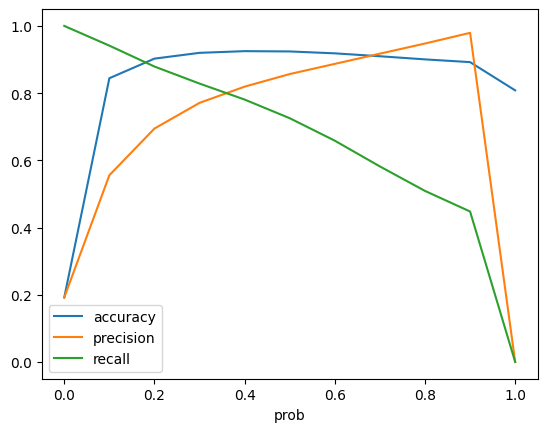

In [539]:
cut_df.plot.line(x = 'prob', y = ['accuracy', 'precision', 'recall'])

In [540]:
prob_test = logreg.predict_proba(X_test)[:,1]
y_pred = [1 if i>0.3 else 0 for i in prob_test]

In [541]:
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('F1-score: ', f1_score(y_test, y_pred))
print('ROC-AUC: ', roc_auc_score(y_test, y_pred))

Accuracy:  0.920047250458516
Recall:  0.8287788563504365
Precision:  0.7694055282090118
F1-score:  0.7979893182532203
ROC-AUC:  0.8851549958704505


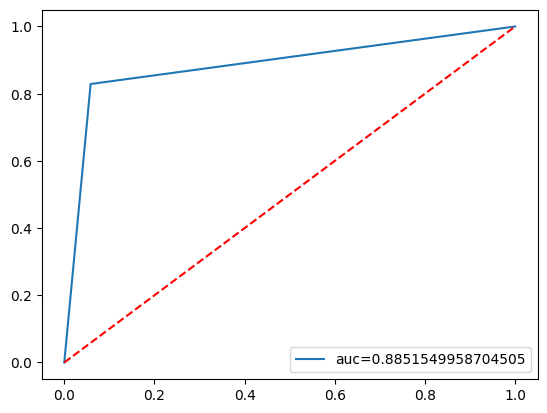

In [542]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4)
plt.show()

**Precision Recall curve**

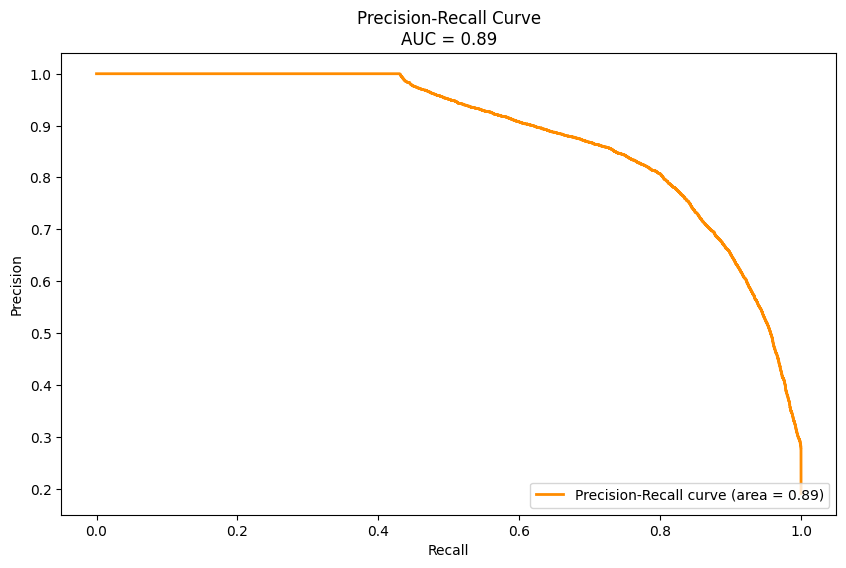

In [543]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, auc


# Predict probabilities for the positive class
y_prob = logreg.predict_proba(X_test)[:, 1]

# Compute Precision-Recall curve and AUC
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve (area = {:.2f})'.format(pr_auc))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve\nAUC = {:.2f}'.format(pr_auc))
plt.legend(loc='lower right')
plt.show()

In [544]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score


# Predict probabilities on the test set
y_prob = logreg.predict_proba(X_test)[:, 1]

# Set a threshold to classify predictions
threshold = 0.5  # You can adjust this threshold based on your needs

# Convert probabilities to binary predictions
y_pred = np.where(y_prob > threshold, 1, 0)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate AUC-ROC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nAUC-ROC Score: {roc_auc}")


Confusion Matrix:
[[50561  1518]
 [ 3305  8954]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     52079
           1       0.86      0.73      0.79     12259

    accuracy                           0.93     64338
   macro avg       0.90      0.85      0.87     64338
weighted avg       0.92      0.93      0.92     64338


AUC-ROC Score: 0.9606582243741872


# **Feature importance**

In [546]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000,class_weight="balanced")

In [547]:
lr.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [548]:
lr.score(X_test,y_test)

0.9005253504927103

In [549]:
lr.coef_.round(2)

array([[ 0.68,  0.47, -0.4 ,  0.05,  0.04,  2.31, 11.97,  0.17,  0.29,
         0.04,  0.11,  0.45,  0.84,  0.86, -0.34,  0.85, -0.38,  2.23,
        31.26]])

In [550]:
feature_importance = pd.DataFrame(index = df.drop(["loan_status"],
                                                  axis = 1).columns,
                                  data = lr.coef_.ravel()).reset_index()
feature_importance

,index,0
0,loan_amnt,0.680410
1,term,0.472245
2,int_rate,-0.397947
3,installment,0.051951
4,grade,0.043912
5,sub_grade,2.314778
6,emp_title,11.965086
7,emp_length,0.173168
8,home_ownership,0.291493
9,annual_inc,0.039633


<Axes: xlabel='0', ylabel='index'>

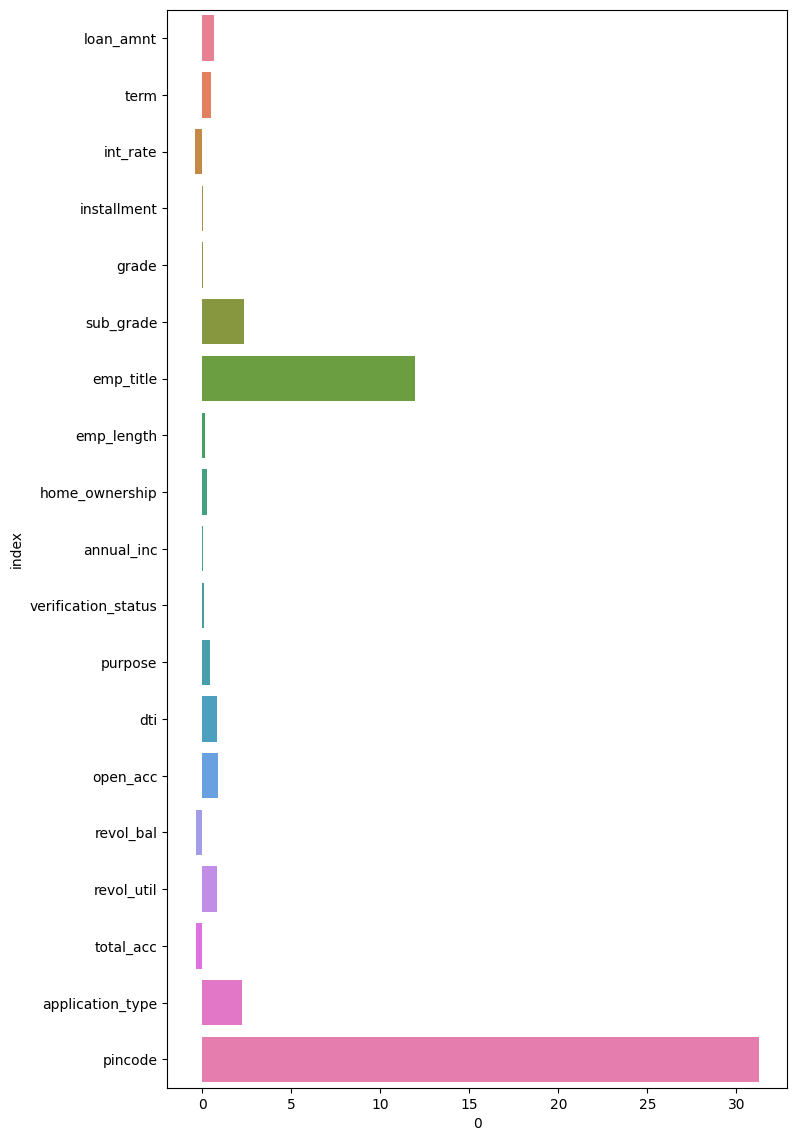

In [551]:
plt.figure(figsize=(8,14))
sns.barplot(y = feature_importance["index"],
           x =  feature_importance[0], hue=feature_importance["index"])

### **Questionnaire:**

1. What percentage of customers have fully paid their Loan Amount?
 * **80% **of the given data has **fully paid** loan-status

2. Comment about the correlation between Loan Amount and Installment features.
 * 0.95 - **Highest correlation** among the data is observed between loan amount and the installment features.

3. The majority of people have home ownership as **Mortgage**(1.9lakh), "own" home data is only 37k.

4. People with grades ‘A’ are more likely to fully pay their loan.
 * 60% True. B grade is most likely to pay off their loan than A.

5. Name the top 2 afforded job titles.
 * Teacher and Manager

6. Thinking from a bank's perspective, which metric should our primary focus be on..
 * **ROC AUC score and F1 score**(since it takes both precision and recall into consideration) the higher the scores, the lesser the False postive and False negative values.

7. How does the gap in precision and recall affect the bank?
 * In general, if Recall value is high, it means the number of False negative cases are less. And if Precision is high, that mean number of False positive cases are less.
 * In terms with the bank, if someone who truly deserved and could've paid off the loan has been denied it, it would affect the potential customer and also profit might be lost, hence higher the recall value the better.
 * And if someone who cannot pay off the loan, has been granted loan, then the bank might end up in loss. Hence False positive numbers should be less and Precision should be high.
 * Based on the confusion matrix, the recall and precision value seems higher for "fully paid" loan status, and slightly lower than that for "Charged off"
 loan status.

8. Which were the features that heavily affected the outcome?
 * **Interest rate, total credit revolving balance(revol_bal) and total number of credit lines currently in the borrower's credit file(total_acc)** are some features that falls under negative line in feature importance.

9. Will the results be affected by geographical location?
 * 11650, 86630, 93700 - are pincode of few geographical locations, where all the areas have 100% "charged off" status and the entire calculation was done with and without using the area and it seems that, ignoring pincode significantly affects the final result of the Logistic Regression model.
 But the Geographical location alone doesn't affect the model

**Tradeoff Questions:**
1. How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.
 - Then we need to make sure that the precision score is high.

2. Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone
 - By keeping a higher threshold value(ie) more than 0.5 based on the probability cut-off threshold, we can reduce the FP and increase the precision.

## Insights
*   Given data had 396030 data points , 26 features , 1 label.
*   80% belongs to the class 0 : which are loan fully paid, 20% belongs to the class 1 : which are charged off.
*   Loan Amount distribution / media is slightly higher for Charged_off loan status in some cases. Care should be taken before granting it.
*   Interest Rate - mean and median is higher for Charged_off Loan status.
*   Probability of Charged_off LoanStatus is higher for Loan Grades are E ,F, G.
*   G grade has the highest probability of having defaulter.
*   Similar pattern is visible in sub_grades probability plot.
*   Employment length has overall same probability of Loan_status as fully paid and defaulter, which means defaulters has no relation with their Employment length.
*   Borrowers with rental home, has higher probability of defaulters and borrowers having their home mortgage and owns have lower probability of defaulter.
*   Annual income median is lightly higher for those who's loan status is as fully paid. But some cases with higher annual income also has few cahrged off status.
*   Major reason for loans has been observed to be debt-consolidation and credit card payoffs.
*   Most important features/ data for prediction , as per Logistic Regression model is  Employee Title, Loan Grade and Sub-Grade, Interest rate and dept-to-income ratio.

# Recommendations
- We should try to keep the precision higher as possible compare to recall , and keep the false positive low.That will help not to missout the opportunity to finance more individuals and earn interest on it. This we can achieve by  setting up the higher threshold.
- Since NPA is a real problem in the industry , Company should more investigate and check for the proof of assets. Since it was observed in probability plot, verified borrowers had higher probability of defaulters than non-varified.
- Giving loans to those who have no mortgage house of any owned property have higher probability of defaulter, but the defaulters numbers are less for borrowers with "OWN" home, so this particular category can be taken into consideration while giving the loan in case of NPA.
- Keeping the interest rate less, can help us achieve "Fully paid" status, since its one of the major factor affecting the loan status.
- Since total revolving credit balance plays a major part in loan status, this can be another feature taken into consideration before providing the loan.

